# Credit Card Transaction Classification

### [Introduction](#intro)
### [Exploratory Data Analysis (EDA)](#eda)
* [Understand - Structure & Variable Distribution](#understand)
* [Clean - Scale, Balance, & Outlier Handling](#clean)
* [Analyze Relationships - Correlation](#relate)

### [Modeling](#model)
* [Logistic Regression](#logistic)
* [Boosted Decision Tree](#bdt)
* [Random Forest](#forest)
* [Neural Network](#nn)

### [Conclusions](#outro)
### [Citations](#citations)

## Introduction
<a id="intro"></a>

According to the Federal Bureau of Investigation, "Credit card fraud is the unauthorized use of a credit or debit card, or similar payment tool (ACH, EFT, recurring charge, etc.), to fraudulently obtain money or property. Credit and debit card numbers can be stolen from unsecured websites or can be obtained in an identity theft scheme."[$^{1}$](#1)

In the FTC's Consumer Sentinel Network Data Book 2019 it was noted that "Credit card fraud tops the list of identity theft reports in 2019. The FTC received more than 271,000 reports from people who said their information was misused on an existing account or to open a new credit card account."[$^{2}$](#2) The Nilson Report, the leading global card and mobile payments trade publication, releases annual fraud statistics and indicated in the November 2019 issue that global losses had amounted to \\$27.85 billion. The United States which represents 21.54% of transactions accounted for \\$9.47 or 33.99% of the gross worldwide losses.[$^{3}$](#3)  

With data breaches becoming more common in recent years we can imagine that these numbers will continue to rise presenting an opportunity for credit card companies to take a proactive stance on detecting fraudulent charges quickly.[$^{4}$](#4) We will explore various models utilizing a credit card transaction data set from Kaggle and evaluating which has the highest accuracy for classifying an incoming transaction as fraudulent or normal. 

The data set is provided by [The Machine Learning Group (MLG)](https://mlg.ulb.ac.be/wordpress/) of [Université Libre de Bruxelles (ULB)](https://www.ulb.be) and contains transactions made by european cardholders in September 2013.

## Exploratory Data Analysis (EDA)
<a id="eda"></a>

First we need to explore the data set to **understand** our variables,
**clean** our dataset, and **analyze relationships** between variables. Ultimately EDA should allow us to answer the following questions from Daniel Bourke's article [A Gentle Introduction to Exploratory Data Analysis](https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184)[$^{5}$](#5):
* *What question(s) are you trying to solve (or prove wrong)?*
* *What kind of data do you have and how do you treat different types?*
* *What’s missing from the data and how do you deal with it?*
* *Where are the outliers and why should you care about them?*
* *How can you add, change or remove features to get more out of your data?*

While we won't explicitly answer these questions in this paper we will approach understanding, cleaning, and analyzing with them in mind. Before we begin it is important to remember that except for `Time` and `Amount` all explanatory variables are transformed due to privacy reasons. The explanatory variables were transformed through [prinicpal component analysis or PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) and no further information can be provided regarding features `V1, V2, ..., V28`.

`Time` contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature `Amount` is the transaction amount, this feature can be used for example-dependant cost-senstive learning. Finally the feature `Class` is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Understand - Structure & Variable Distribution
<a id="understand"></a>
We start by reading in the credit card transaction data set CSV file as a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object and look a sample of some records using the [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method. Then begin exploring using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to obtain descriptive statistics about each of the available variables.[$^{6}$](#6)

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('Data/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67811,52702.0,-0.719329,0.176133,2.621787,-0.533871,0.161389,0.691249,0.280369,0.055878,0.656239,-0.249113,0.625719,-0.026493,-1.410082,-0.549008,-0.662760,0.195370,-0.656515,0.102615,-0.499068,-0.071123,-0.048947,0.202238,-0.245739,-0.304712,-0.267055,0.131945,-0.383946,-0.333228,11.50,0
123653,77013.0,-0.683003,0.516685,2.148445,1.010427,-0.140088,-0.111080,0.388128,0.112072,0.208051,-0.706773,-1.240854,0.307742,-0.147532,-0.519911,-1.182004,-0.661517,0.181109,-0.248423,0.300610,0.018008,0.013285,0.244254,-0.172522,0.411807,0.178290,-0.336214,0.139056,0.130837,35.00,0
264708,161555.0,2.009978,-1.820963,-0.368425,-1.465871,-1.863019,-0.538701,-1.344351,-0.022121,-1.187157,1.650914,0.774037,-0.160988,0.040625,-0.295080,-0.588844,-0.048062,0.189466,0.359738,0.081064,-0.238179,-0.287112,-0.640236,0.377890,0.001441,-0.704746,-0.518904,0.012038,-0.026427,119.30,0
63752,50855.0,0.378035,-2.143389,-0.077327,-1.131550,-1.271434,0.180909,-0.180201,0.047452,2.049915,-1.413161,-1.033137,0.219311,-0.378974,-0.019231,1.782530,-0.388232,-0.052270,0.199770,0.495254,0.830835,0.364499,0.259284,-0.587301,-0.673330,0.335258,0.129730,-0.030839,0.092312,474.44,0
5872,6401.0,-2.343928,0.866964,-0.729968,2.051864,2.837229,3.775404,0.205653,0.818675,-0.477224,0.823193,0.626236,-3.113460,1.771948,2.115412,0.579607,0.049645,0.478513,0.569835,1.268260,-0.560732,-0.248647,-0.269847,0.332888,0.963466,0.740724,0.293177,-0.914269,0.444863,54.81,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The data set consists of `284807` observations of `31` variables, `30` explanatory and `1` response. Our data set does not contain any missing values making [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) irrelevant. It should be noted that "the problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data." [$^{7}$](#7) Various imputation methods can be taken when less than 30% of observations are missing, however, for scenarios where more than 30% of observations are missing it is best practice to remove the variable(s) in question. 

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Looking at the response variable `Class` we see the dataset is very unbalanced with only **0.17%** of observations result in a fraudulent transactions. This is to be expected if fraudulent transactions were very common credit card companies would lose money and likely cease to operate. The topic of balancing will be explored the next section but lets continue reviewing the structure and distribution of our available variables.

In [4]:
df['Class'].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [5]:
df['Class'].value_counts(sort=False).plot.bar(
    title="Class Frequency Distribution\n0 = Normal\n1 = Fraud", 
    color=['grey','red'],
    rot=0,
    figsize=(13,5)
);

`Time` appears to be cyclical with periods every approximately `86000` seconds (24 hours). The scale of values is also interesting and we can look into scaling these values down. 

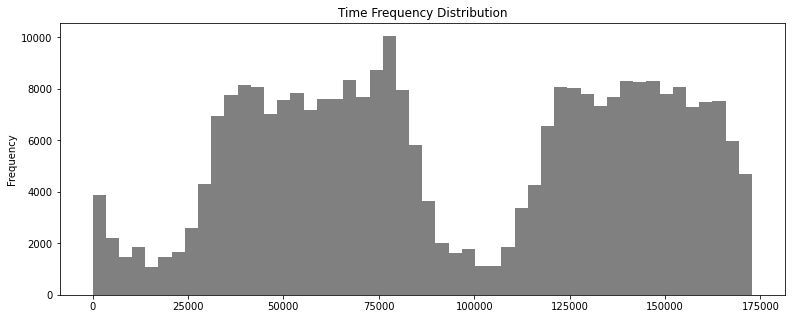

In [6]:
df['Time'].plot.hist(
    title="Time Frequency Distribution",
    bins=50, 
    color='grey',
    figsize=(13,5)
);

`Amount` is a highly skewed variable with maximum observed value of `25,691.16` however most transactions averaging at only `88`. Again because of the wide distribution of values we might seek to scale the values down. 

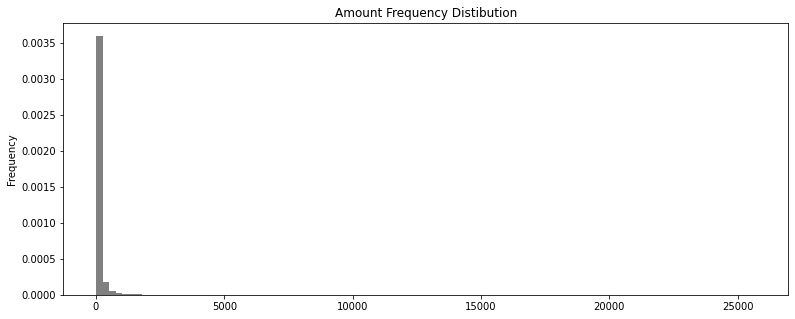

In [7]:
df['Amount'].plot.hist(
    title="Amount Frequency Distibution",
    bins=100,
    color='grey',
    figsize=(13,5),
    density=True
);

All of our PCA variables,`V1, V2, ..., V28`, as mentioned before have been transformed.

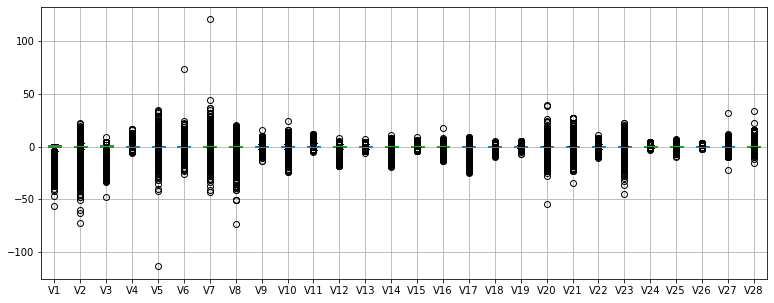

In [8]:
df.drop(['Time','Amount','Class'],axis=1).boxplot(figsize=(13,5));

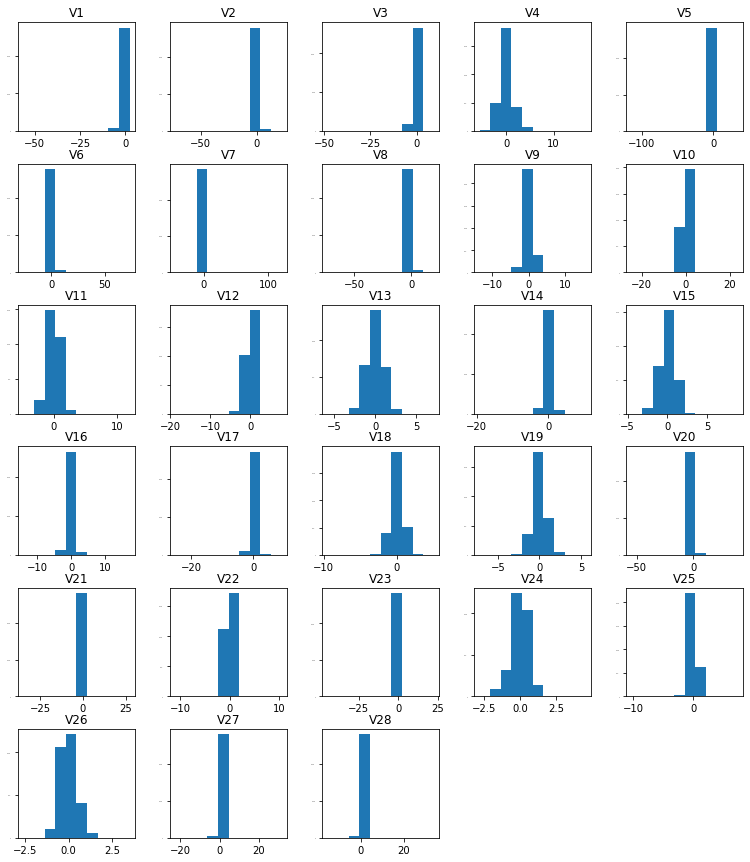

In [9]:
df.drop(['Time','Amount','Class'],axis=1).hist(
    figsize=(13,15), 
    ylabelsize=False,
    grid=False
);

Looking closer we can see some variety in the distributions even though all the PCA variables have mean values of `0`. Distributions of variables `V4`, `V12`, and `V28` are shown below. `V4` shows a slightly right skewed, `V12` appears to be left skewed, and `V28` shows a very narrow distribution. We will look at these distributions with respect to our target variable `Class` later.

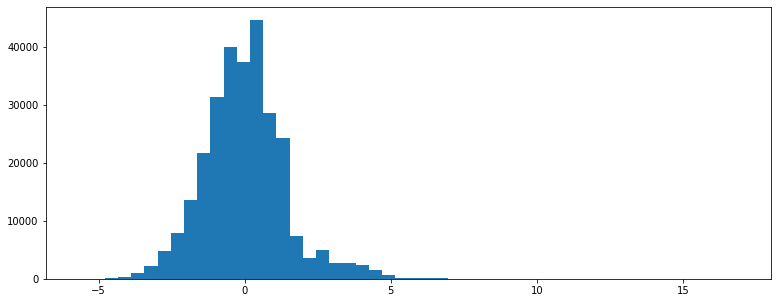

In [10]:
df.V4.hist(
    bins=50,
    figsize=(13,5),
    grid=False
);

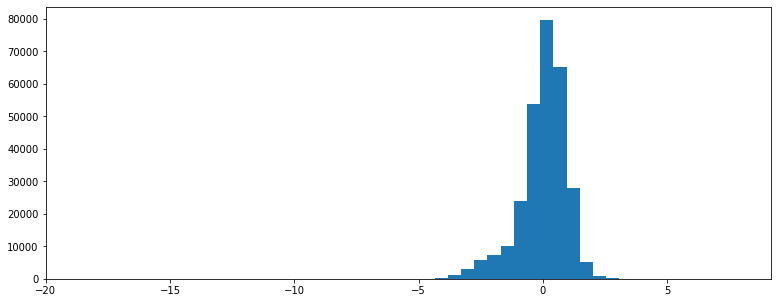

In [11]:
df.V12.hist(
    bins=50,
    figsize=(13,5),
    grid=False
);

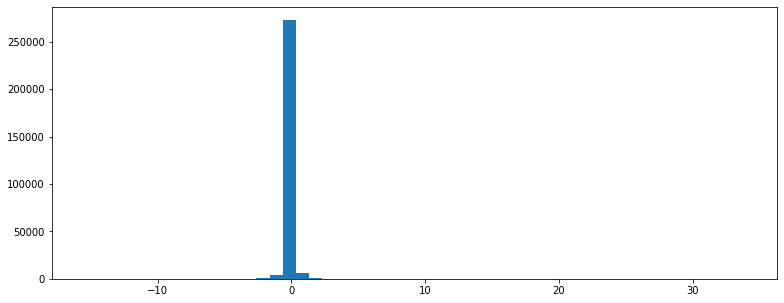

In [12]:
df.V28.hist(
    bins=50,
    figsize=(13,5),
    grid=False
);

Before we proceed to clean our data set we will make a copy to compare with later. 

In [13]:
original = df.copy()

<a id="clean"></a>
### Clean - Scale, Balance, & Outlier Handling


Now we will revisit the variables `Time` and `Amount` to scale them. [Feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) is a set of methods used to normalize the range of explanatory variables.[$^{8}$](#8) The primary methods are: 
* [rescaling (min-max normalization)](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization))
* [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling#Mean_normalization)
* [standardization (z-score normalization)](https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization))
* [scaling to unit length](https://en.wikipedia.org/wiki/Feature_scaling#Scaling_to_unit_length)

Baijayanta Roy does a great job outlining several reasons why scaling is desirable in support of some machine learning algorithms. In [All about Feature Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35) Roy notes that "Neural network gradient descent converge much faster with feature scaling than without it."

He continues, "Scaling is critical while performing **Principal Component Analysis (PCA)**. PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features." [$^{9}$](#9)

Given the use of PCA in our dataset it seems highly advisable to use feature scaling for the `Time` and `Amount` variables. `Time` doesn't have any substantial outliers, however `Amount` is heavily right skewed resulting in a large number of outliers as seen in the [Matplotlib](https://matplotlib.org) boxplots below.[$^{10}$](#10) 

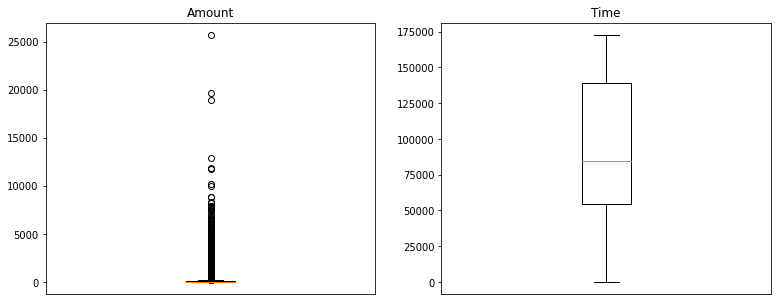

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
axes[0].get_xaxis().set_visible(False)
axes[0].set_title('Amount')
axes[0].boxplot(df['Amount'])
axes[1].get_xaxis().set_visible(False)
axes[1].set_title('Time')
axes[1].boxplot(df['Time']);

Using RobustScaler from the [Scikit-learn](https://scikit-learn.org/stable/index.html) package because it is as the name suggests robust to outliers. According to the [sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) documentation, 

"This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method."[$^{11}$](#11)

In [15]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
time_scaled = scaler.fit_transform(df['Time'].values.reshape(-1,1))
amount_scaled = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df.insert(0, 'time_scaled', time_scaled)
df.insert(1, 'amount_scaled', amount_scaled)

Next we will look to balance the dataset to avoid overfitting in our downstream models. "Many real world classification problems are represented by highly unbalanced data sets, in which, the number of samples from one class is much smaller than from another. This is known as class imbalance problem and is often reported as an obstacle to constructing a model that can successfully discriminate the minority samples from the majority samples."[$^{12}$](#12)

To address the class imbalance problem we will utilize a combination of Random Under Sampling and SMOTE. Random Under Sampling, a technique where we identify _n_, the minimum observations between our response variable classes, then take a random sample of size _n_ from the class with more observations to have a resulting 50/50 ratio. It should be noted that this process can result in loss of information but depending on the use case may have good results.[$^{13}$](#13) 

SMOTE, which stands for Synthetic Minority Over-sampling Technique, over-samples the minority class by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the _k_ minority class nearest neighbors. Synthetic samples are generated by taking the difference between the sample under consideration and its nearest neighbor, multiplying the difference by a random number between 0 and 1 then adding it to the sample under consideration. This technique ultimately forces the decision region of the minority class to become more general.[$^{25}$](#25)  

We happen to have **492 Fraud** transactions and **284315 Normal** transactions so we will use Random Under Sampling to sample 4920 observations from the normal subset and SMOTE to generate 4920 Fraud observations. 

In [16]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
fraud = df[df['Class']==1]
normal = df[df['Class']==0].sample(len(fraud)*100)
df = pd.concat([normal,fraud])
sm = SMOTE()
x = df.drop(['Class'], axis = 1)
y = df["Class"]
x_res, y_res = sm.fit_resample(x, y)
df = x_res
df['Class'] = y_res
df = df.sample(frac=1)

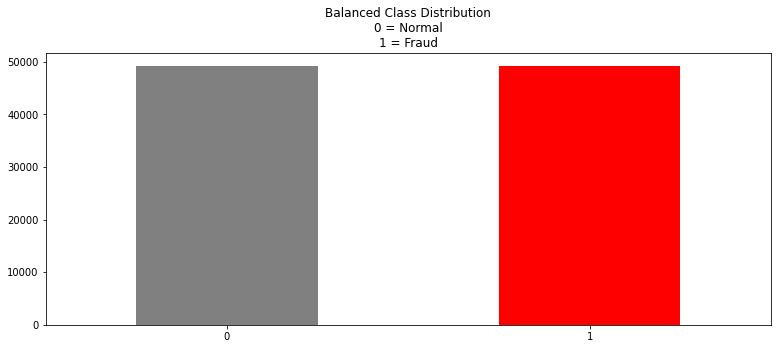

In [18]:
df['Class'].value_counts(sort=False).plot.bar(
    title="Balanced Class Distribution\n0 = Normal\n1 = Fraud", 
    color=['grey','red'],
    rot=0,
    figsize=(13,5)
);

Next up in the clean phase is outlier handling. Outliers can come in a variety of forms, the most common are **Global Anomalies** a.k.a. point anomalies, **Contextual Anomalies** a.k.a. conditional anomalies, and **Collective Anomalies**. These outliers are often the result of data entry errors, measurement errors, or are simply natural outliers.[$^{14}$](#14)

Jim Frost in [Guidelines for Removing and Handling Outliers in Data](https://statisticsbyjim.com/basics/remove-outliers/) notes, "Sometimes it’s best to keep outliers in your data. They can capture valuable information that is part of your study area."[$^{15}$](#15) Others such as Tamás Nyitrai and Miklós Virág in [The effects of handling outliers on the performance of bankruptcy prediction models](https://doi.org/10.1016/j.seps.2018.08.004) indicate that "There seems to be consensus in the literature on the necessity of handling outliers, at the same time, it is not clear how to define extreme values to be handled in order to maximize the predictive power of models."[$^{16}$](#16)

Given the seemingly conflicting ideas around outlier handling we will opt to look at very extreme values and use imputation to replace the removed values which should provide us with overall improvements to our model accuracy metrics. While there are a number of different outlier detection techniques we will be using the IQR method, specifically targeting the most extreme values (3X IQR) applying a univariate approach. For imputation we will leverage [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer) from Scikit-learn to replace the removed values. 

IterativeImputer uses "\[a\] strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion", which was inspired by the R MICE package (Multivariate Imputation by Chained Equations). This multivariate approach for imputation typically results in a significantly lower MSE when compared to simple univariate mean imputation. 

For a summary of several outlier detection techniques including Z-score method, Winsorization method, Isolation Forest, and more see Naresh Bhat's [Outlier!!! The Silent Killer](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer) notebook on Kaggle.[$^{17}$](#17) 

In [19]:
import numpy as np
outliers = {}
for col in df.drop(['time_scaled','amount_scaled','Class'], axis=1).columns:
    q25 = np.percentile(df[col].loc[df['Class'] == 1].values, 25) 
    q75 = np.percentile(df[col].loc[df['Class'] == 1].values, 75)
    iqr = q75 - q25
    upper = q75 + (iqr * 3)
    lower = q25 - (iqr * 3)
    outliers[col] = [x for x in df[col].loc[df['Class'] == 1].values 
                if x < lower or x > upper]
    df[col].replace(df[(df[col] > upper) | (df[col] < lower)].index, np.nan, inplace=True)

In [20]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10)
imp_arr = imputer.fit_transform(df)
df = pd.DataFrame(imp_arr, columns=df.columns)

Below we compare boxplots from our original dataframe and the now cleaned dataframe. Notice the y-axis scale is significantly reduced in our cleaned dataframe and the boxes are actually visible for most of our variables.

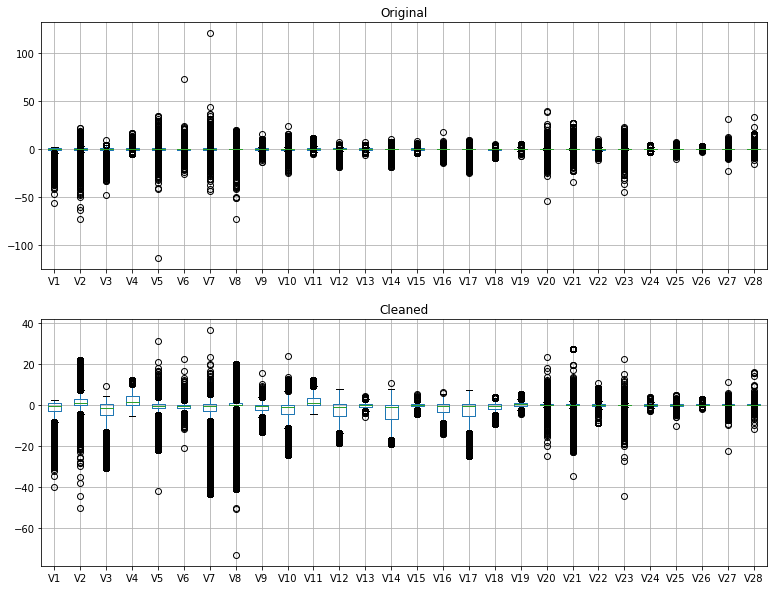

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13,10));
axes[0].set_title('Original');
original.drop(['Time','Amount','Class'],axis=1).boxplot(figsize=(13,5), ax=axes[0]);
axes[1].set_title('Cleaned');
df.drop(['time_scaled','amount_scaled','Class'],axis=1).boxplot(figsize=(13,5), ax=axes[1]);

<a id="relate"></a>
### Analyze Relationships - Correlation

We continue by looking at the correlation across our explanatory variables. "Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related."[$^{18}$](#18) 

We will be using the Pearson correlation coefficient (PCC) as our statistic for measuring the relationships between our variables. PCC, also referred to as Pearson's _r_, is a statistic that measures the linear correlation between two variables _X_ and _Y_ and has a value between -1 and +1. Variables with a positive correlation (PCC > 0) behave in a manner in which the increase in one of the variables results in an increase in the other. The opposite can be said of variables with a negative correlation (PCC < 0), an increase in one of the variables results in a decrease in the other. Variables with PCC close to 0 have no linear correlation.[$^{19}$](#19)

Below is a heatmap generated using the [Seaborn](https://seaborn.pydata.org/index.html) data visualization library and reflecting the Pearson correlation coefficient between all pairs of variables.[$^{20}$](#20) <span style="color:darkblue"> **Dark blue**</span> indicating strong positive correlation (PCC $\approx$ +1) and <span style="color:darkred"> **dark red**</span> indicating strong negative correlation (PCC $\approx$ -1).

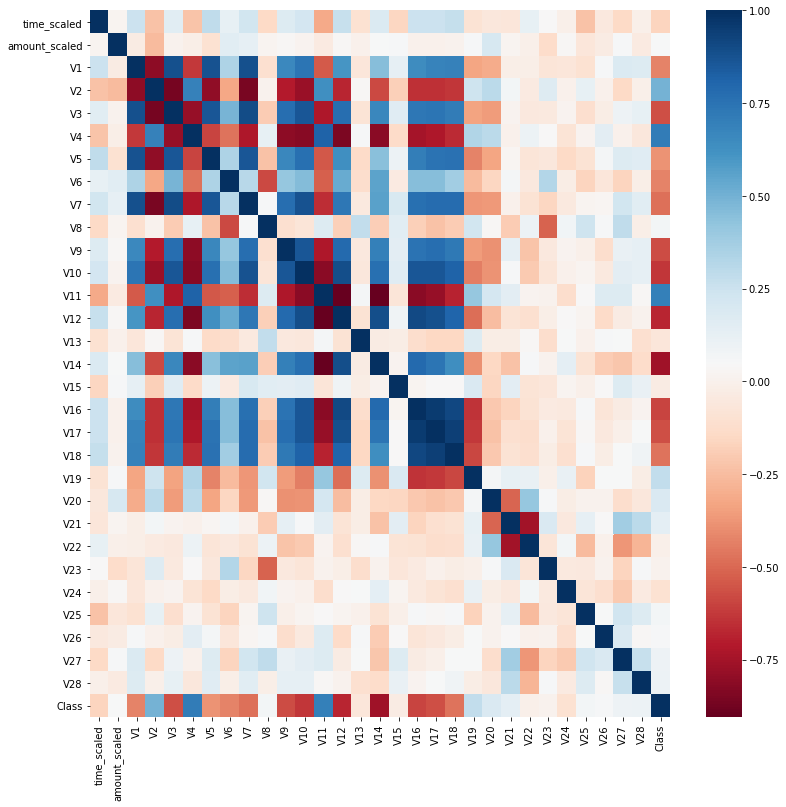

In [22]:
import seaborn as sns
corr = df.corr()
fig = plt.figure(figsize=(13,13))
sns.heatmap(
    corr, 
    cmap="RdBu",
    xticklabels=corr.columns,
    yticklabels=corr.columns
);

Listing the PCC for all explanatory variables with respect to our dependent variable `Class` in ascending order

In [23]:
corr['Class'].sort_values()

V14             -0.758179
V12             -0.681801
V10             -0.635546
V16             -0.599287
V9              -0.572740
V17             -0.565168
V3              -0.563408
V7              -0.478374
V18             -0.469761
V1              -0.427642
V6              -0.421869
V5              -0.383568
time_scaled     -0.165739
V24             -0.096195
V13             -0.070228
V15             -0.030070
V22             -0.007450
V23              0.005794
amount_scaled    0.052812
V26              0.054818
V25              0.071008
V8               0.072820
V27              0.098676
V28              0.103270
V21              0.141670
V20              0.192575
V19              0.279006
V2               0.500916
V11              0.696872
V4               0.711754
Class            1.000000
Name: Class, dtype: float64

The variables with the lowest correlations (+/- 0.1) can be removed as they will not provide any valuable information in our models because the distributions are too similar between the two classes. 

In [24]:
df.drop(
    ['V24','V13','V23','V15','V22','V25','V8','V28','V27','V26'], 
    axis=1, 
    inplace=True
)

The variables with largest negative correlations are `V14, V12, V10, V16, V3, V9` and the ones with the largest positive correlations are `V4, V11, V2, V19`. We will look at each of these next to understand how the transactions compare across the two classes. 

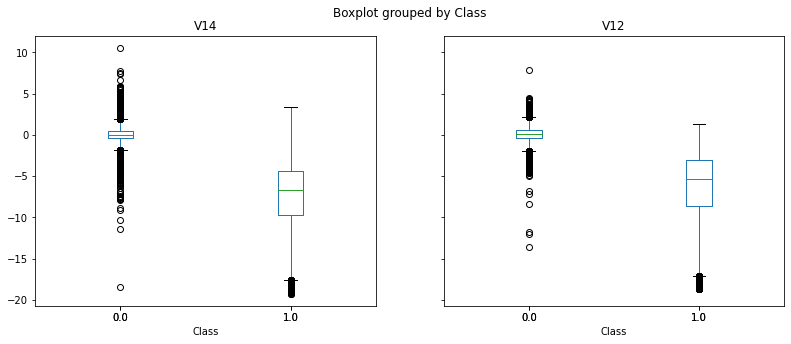

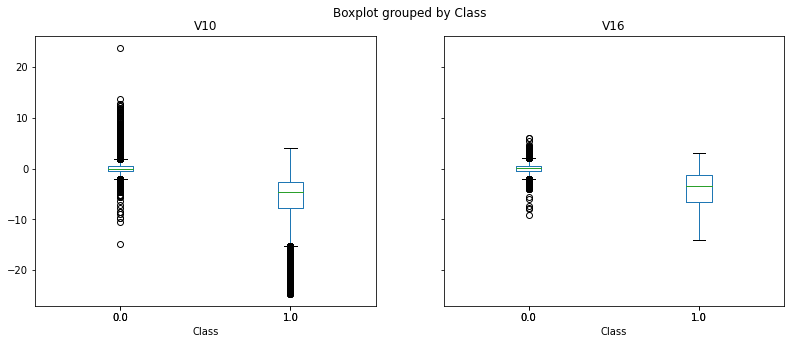

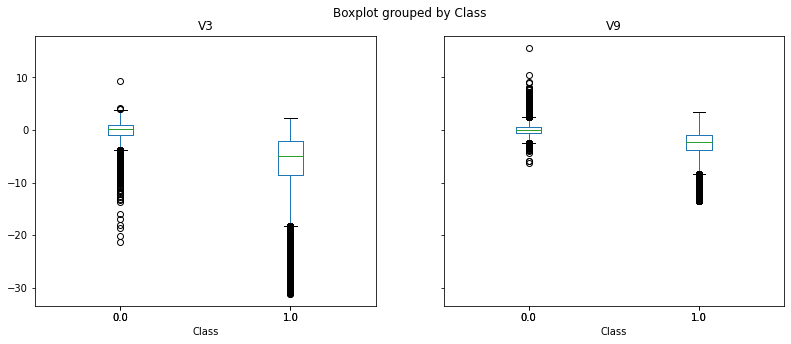

In [25]:
df.boxplot(['V14','V12'], by='Class', figsize=(13,5), grid=False)
df.boxplot(['V10','V16'], by='Class', figsize=(13,5), grid=False)
df.boxplot(['V3','V9'], by='Class', figsize=(13,5), grid=False);

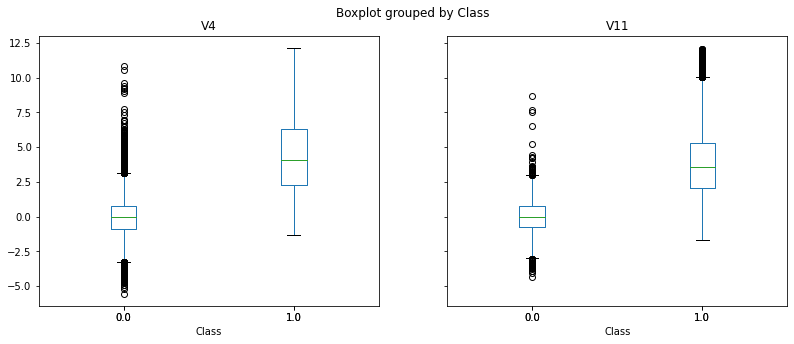

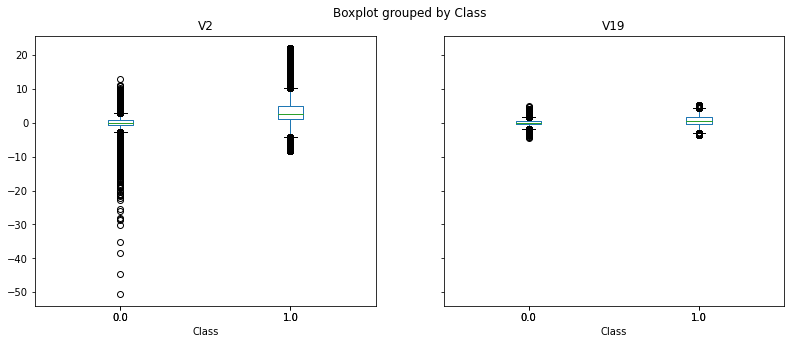

In [26]:
df.boxplot(['V4', 'V11'], by='Class', figsize=(13,5), grid=False)
df.boxplot(['V2', 'V19'], by='Class', figsize=(13,5), grid=False);

Another way to compare the distributions of the remaining variables with respect to class is by using histogram plots with kernel density estimates (KDE) overlay. 

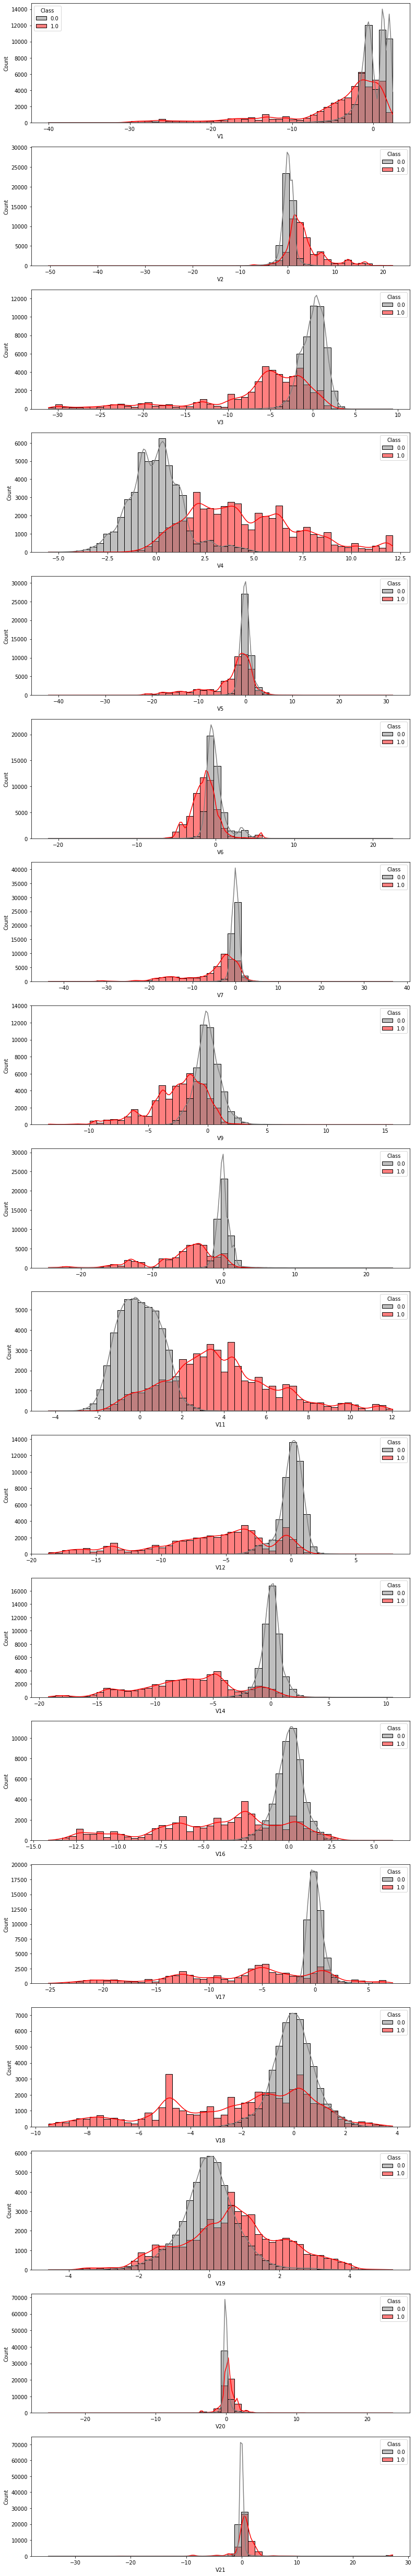

In [27]:
pca_vars = df.drop(['time_scaled','amount_scaled','Class'], axis=1).columns
fig, axes = plt.subplots(nrows=len(pca_vars), ncols=1, figsize=(13,len(pca_vars)*5));
for var in pca_vars:
    sns.histplot(
        data=df, 
        x=var, 
        bins=50, 
        kde=True, 
        hue='Class', 
        palette=['grey','red'],
        ax=axes[list(pca_vars).index(var)]
    );

<a id="model"></a>
## Modeling

Before we begin generating various predictive models from our Binary Classification problem it is important to discuss how we can assess model performance. [Amazon Machine Learning Developer Guide](https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html) indicates "\[t\]ypical metrics are accuracy (ACC), precision, recall, false positive rate, \[and\] F1-measure".[$^{21}$](#21)

These evaluation metrics are calculated from four basic combinations of actual data cateogry and assigned category:
* True Positive (TP) - correct positive assignment
* True Negative (TN) - correct negative assignment
* False Positive (FP) - incorrect positive assignment
* False Negative (FN) - incorrect negative assignment

Specifically, accuracy is the fraction of correct assignment (TP + TN)/(TP + TN + FP + FN), precision is the fraction of TP/(TP + FP), recall a.k.a. sensitivity is the fraction TP/(TP + FN), false positive rate is FP/(TN + FP), and finally F1-measure or F1-score is the "harmonic mean of precision and recall"[$^{22}$](#22)[$^{23}$](#23) 

<p><center>$\normalsize F_1= \frac{2}{recall^{-1} + precision^{-1}} = 2  \frac{precision * recall}{precision + recall}=\frac{TP}{TP + \frac{1}{2}(FP + FN)}$</center></p>

Depending on the use case one might be more interested in a model that performs well for a specific metric or subset of metrics over others. For credit card fraud it is important that we have both high precision and high recall. F1-measure is often considered to be the most relevant measure in fraud detection due to its combination of of precision and recall into a single metric.[$^{24}$](#24)

Now that we know we need to evaluate our models to favor high recall or high sensitivity we need to split our data into train, test, and validation sets.

In [28]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.20, shuffle=True)
x_train = train_df.drop(['Class'], axis = 1)
y_train = train_df["Class"]
x_test = test_df.drop(['Class'], axis = 1)
y_test = test_df["Class"]

### Logisitic Regression
<a id="logistic"></a>

Logistic model uses the logistic or inverse logit function to model a binary or dichotomous variable. Similar to linear regression, logistic regression fits the data to a line however unlike linear regression the line is not straight but rather an S shaped curved called **Sigmoid**. The S shaped curve is bound on the Y axis between 0 and 1 which fits our goal of binary classification. The sigmoid function (shown below) provides us with a probability of an observation belonging to one of the two classes.[$^{26}$](#26)[$^{27}$](#27)

<p><center>$\normalsize sigmoid(x)= \frac{1}{1+e^{-x}} = \frac{e^{x}}{e^{x}+1}$</center></p>

Note: We will be using a grid search approach for selecting optimal model parameters for all models shown below. For more details on hyperparameter tuning please refer to XX and YY.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
best_clf = clf.fit(x_train, y_train)
print(best_clf.best_params_)

{'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'liblinear'}


In [42]:
y_pred = best_clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud'], digits=5))

              precision    recall  f1-score   support

      Normal    0.91240   0.97673   0.94347      9971
       Fraud    0.97424   0.90370   0.93764      9709

    accuracy                        0.94070     19680
   macro avg    0.94332   0.94022   0.94056     19680
weighted avg    0.94291   0.94070   0.94060     19680



### Boosted Decision Tree
<a id="bdt"></a>

In [32]:
# import xgboost as xgb

# dtrain = xgb.DMatrix(x_train,y_train)
# dtest = xgb.DMatrix(x_test,y_test)
# param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
# param['nthread'] = 4
# param['eval_metric'] = 'auc'
# num_round = 10
# evallist = [(dtest, 'eval'), (dtrain, 'train')]
# bst = xgb.train(param, dtrain, num_round, evallist)
# ypred = bst.predict(dtest)

In [33]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import AdaBoostRegressor
# bdt = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)
# bdt.fit(x_train,y_train)
# y_pred = bdt.predict(x_test)

In [34]:
# print('recall: ', recall_score(y_test,y_pred))
# print('precision: ', precision_score(y_test,y_pred))
# print('f1 score: ', f1_score(y_test,y_pred))

In [35]:
# # recall_score(y_test,y_pred)
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
# auc(fpr, tpr)

### Random Forest
<a id="forest"></a>

In [36]:
# from sklearn.ensemble import RandomForestClassifier

# param_grid = { 
#     'n_estimators': list(range(50, 300, 50)),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4, 5, 6, 7, 8],
#     'bootstrap': [True, False]  # ,
#     #'criterion' :['gini', 'entropy']
# }
# clf = GridSearchCV(RandomForestClassifier(), iid=False, param_grid=param_grid, cv=5)
# best_clf = clf.fit(x_train, y_train)
# best_clf.best_params_

In [37]:
# y_pred = best_clf.predict(x_test)
# recall_score(y_test,y_pred)

### Neural Network
<a id="nn"></a>

In [38]:
# #import tensorflow as tf
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader


In [39]:
# epochs = 50
# batch_size = 64
# learning_rate = 0.001

## Conclusions
<a id="outro"></a>

## Citations
<a id="citations"></a>

<a id=1></a>$^{1}$Credit Card Fraud. 15 June 2016, www.fbi.gov/scams-and-safety/common-scams-and-crimes/credit-card-fraud. 

<a id=2></a>$^{2}$Federal Trade Commission . (2019). Consumer Sentinel Network data book for January–December 2019. Washington, DC. Retrieved from https://www.ftc.gov/system/files/documents/reports/consumer-sentinel-network-data-book-2019/consumer_sentinel_network_data_book_2019.pdf

<a id=3></a>$^{3}$"The Nilson Report Newsletter Archive", The Nilson Report, November 2019, https://nilsonreport.com/upload/content_promo/The_Nilson_Report_Issue_1164.pdf.

<a id=4></a>$^{4}$Sobers, Rob. “107 Must-Know Data Breach Statistics for 2020.” Varonis, 24 Sept. 2020, www.varonis.com/blog/data-breach-statistics/

<a id=5></a>$^{5}$Bourke, Daniel. “A Gentle Introduction to Exploratory Data Analysis.” Medium, Towards Data Science, 13 Feb. 2019, towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184. 

<a id=6></a>$^{6}$[Data structures for statistical computing in python](https://conference.scipy.org/proceedings/scipy2010/pdfs/mckinney.pdf), McKinney, Proceedings of the 9th Python in Science Conference, Volume 445, 2010.

<a id=7></a>$^{7}$Kang H. The prevention and handling of the missing data. Korean J Anesthesiol. 2013;64(5):402-406. doi: [10.4097/kjae.2013.64.5.402](https://doi.org/10.4097/kjae.2013.64.5.402)

<a id=8></a>$^{8}$Wikipedia contributors. "Feature scaling." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 28 Oct. 2020. Web. 1 Nov. 2020.

<a id=9></a>$^{9}$Roy, Baijayanta. “All about Feature Scaling.” Medium, Towards Data Science, 7 Apr. 2020, towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35. 

<a id=10></a>$^{10}$J. D. Hunter, "Matplotlib: A 2D Graphics Environment," in Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, May-June 2007, doi: [10.1109/MCSE.2007.55](https://doi.org/10.1109/MCSE.2007.55)

<a id=11></a>$^{11}$[Scikit-learn: Machine Learning in Python](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

<a id=12></a>$^{12}$Muhammad Atif Tahir, Josef Kittler, Fei Yan,
Inverse random under sampling for class imbalance problem and its application to multi-label classification, Pattern Recognition, Volume 45, Issue 10, 2012, Pages 3738-3750,ISSN 0031-3203, doi: [10.1016/j.patcog.2012.03.014](https://doi.org/10.1016/j.patcog.2012.03.014)

<a id=13></a>$^{13}$Dataman, Dr. “Using Under-Sampling Techniques for Extremely Imbalanced Data.” Medium, Medium, 27 Oct. 2020, medium.com/@Dataman.ai/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8. 

<a id=14></a>$^{14}$Cohen, Ira. “Outliers Explained: a Quick Guide to the Different Types of Outliers.” Medium, Towards Data Science, 8 Nov. 2018, towardsdatascience.com/outliers-analysis-a-quick-guide-to-the-different-types-of-outliers-e41de37e6bf6. 

<a id=15></a>$^{15}$Frost, Jim. “Guidelines for Removing and Handling Outliers in Data.” Statistics By Jim, 6 June 2020, statisticsbyjim.com/basics/remove-outliers/. 

<a id=16></a>$^{16}$Nyitrai, Tamás, and Miklós Virág. “The Effects of Handling Outliers on the Performance of Bankruptcy Prediction Models.” Socio-Economic Planning Sciences, vol. 67, 2019, pp. 34–42., doi:[10.1016/j.seps.2018.08.004](https://doi.org/10.1016/j.seps.2018.08.004) 

<a id=17></a>$^{17}$Bhat, Naresh. “Outlier!!! The Silent Killer.” Kaggle, Kaggle, 26 Oct. 2020, www.kaggle.com/nareshbhat/outlier-the-silent-killer. 


<a id=18></a>$^{18}$Franzese, Monica, and Antonella Iuliano. “Correlation Analysis.” Encyclopedia of Bioinformatics and Computational Biology, 2019, pp. 706–721., doi:[10.1016/b978-0-12-809633-8.20358-0](https://doi.org/10.1016/b978-0-12-809633-8.20358-0) 

<a id=19></a>$^{19}$Wikipedia contributors. "Pearson correlation coefficient." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 31 Oct. 2020. Web. 2 Nov. 2020.

<a id=20></a>$^{20}$Waskom, Michael et al. “Mwaskom/Seaborn.” 0.11.0, Zenodo, Sept. 2020, doi.org/10.5281/zenodo.592845. 

<a id=21></a>$^{21}$Mitchell, Tom M. “Machine Learning.” Amazon, McGraw Hill, 2017, docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html. 

<a id=22></a>$^{22}$Wikipedia contributors. "Sensitivity and specificity." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 20 Oct. 2020. Web. 2 Nov. 2020.

<a id=23></a>$^{23}$Wikipedia contributors. "F-score." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 22 Oct. 2020. Web. 2 Nov. 2020.

<a id=24></a>$^{24}$Pozzolo, Andrea Dal, et al. “Learned Lessons in Credit Card Fraud Detection from a Practitioner Perspective.” Expert Systems with Applications, vol. 41, no. 10, 2014, pp. 4915–4928., doi:[10.1016/j.eswa.2014.02.026](https://doi.org/10.1016/j.eswa.2014.02.026) 

<a id=25></a>$^{25}$Chawla, N. V., et al. “SMOTE: Synthetic Minority Over-Sampling Technique.” Journal of Artificial Intelligence Research, vol. 16, 2002, pp. 321–357., doi:[10.1613/jair.953](https://doi.org/10.1613/jair.953) 

<a id=26></a>$^{26}$Zornoza, Jaime. “Logistic Regression Explained.” Medium, Towards Data Science, 13 Oct. 2020, towardsdatascience.com/logistic-regression-explained-9ee73cede081. 

<a id=27></a>$^{27}$Chao-Ying Joanne Peng, Kuk Lida Lee & Gary M. Ingersoll (2002) An Introduction to Logistic Regression Analysis and Reporting, The Journal of Educational Research, 96:1, 3-14, DOI: [10.1080/00220670209598786](https://doi.org/10.1080/00220670209598786) 


Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. [Calibrating Probability with Undersampling for Unbalanced Classification](https://www.researchgate.net/publication/283349138_Calibrating_Probability_with_Undersampling_for_Unbalanced_Classification). In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. [Credit card fraud detection: a realistic modeling and a novel learning strategy](https://www.researchgate.net/publication/319867396_Credit_Card_Fraud_Detection_A_Realistic_Modeling_and_a_Novel_Learning_Strategy), IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea [Adaptive Machine learning for credit card fraud detection](http://di.ulb.ac.be/map/adalpozz/pdf/Dalpozzolo2015PhD.pdf) ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. [Scarff: a scalable framework for streaming credit card fraud detection with Spark](https://www.researchgate.net/publication/319616537_SCARFF_a_Scalable_Framework_for_Streaming_Credit_Card_Fraud_Detection_with_Spark), Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. [Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi [Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection](https://www.researchgate.net/publication/332180999_Deep-Learning_Domain_Adaptation_Techniques_for_Credit_Cards_Fraud_Detection), INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi [Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection](https://www.researchgate.net/publication/333143698_Combining_Unsupervised_and_Supervised_Learning_in_Credit_Card_Fraud_Detection) Information Sciences, 201